# Reference-based Simulation

In this tutorial, we performed reference-based simulation using Spider, which infers both the transition matrix and cell type proportions directly from the reference dataset. For our reference data, we employed single-cell resolution spatial transcriptomics data from the mouse visual cortex (available at https://www.starmapresources.com/data). This comprehensive dataset captured 1,549 cells representing 15 distinct cell types, which were rigorously identified through clustering analysis with carefully curated marker genes.

In [1]:
import spider as sp
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import itertools
import anndata as ad

In [2]:
sc.set_figure_params( color_map = 'viridis',figsize=(3,6))

In [3]:
ref_path = "./Benchmark_datasets/"

In [4]:
#choose cell_level data
ref_adata = sc.read(ref_path + "use_ref.h5ad")

In [5]:
save_path = "./"

In [6]:
Num_ct_sample = np.bincount(ref_adata.obs.label)
Num_celltype = len(Num_ct_sample)
real_celltype = np.unique(ref_adata.obs.celltype)
match_list = dict(zip(range(len(Num_ct_sample)),real_celltype))

## Simulation using PSA function

In [8]:
spider_adata = sp.PSA(grid_row=10, grid_col=10, adata=ref_adata,perturb=True,seed=2025)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/era/anaconda3/envs/spider/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
/Users/era/anaconda3/envs/spider/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
/Users/era/anaconda3/envs/spider/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
/Users/era/anaconda3/envs/spider/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   14.4s


In [9]:
spider_adata = sp.get_sim_cell_level_expr(celltype_assignment=np.array(spider_adata.obs.spider_simu.tolist()) ,
                                       adata=ref_adata,
                                       Num_celltype=len(Num_ct_sample),
                                       Num_ct_sample=Num_ct_sample,
                                       match_list=match_list,
                                       ct_key="celltype")
spider_adata.obs.index = [
    'cell' + str(j) for j in range(spider_adata.shape[0])
]

spider_adata.write_h5ad(save_path+ "/spider_perturb_simu_cell_level.h5ad")


In [14]:
spider_adata.obs["x"] = spider_adata.obsm["spatial"][:,0]
spider_adata.obs["y"] = spider_adata.obsm["spatial"][:,1]

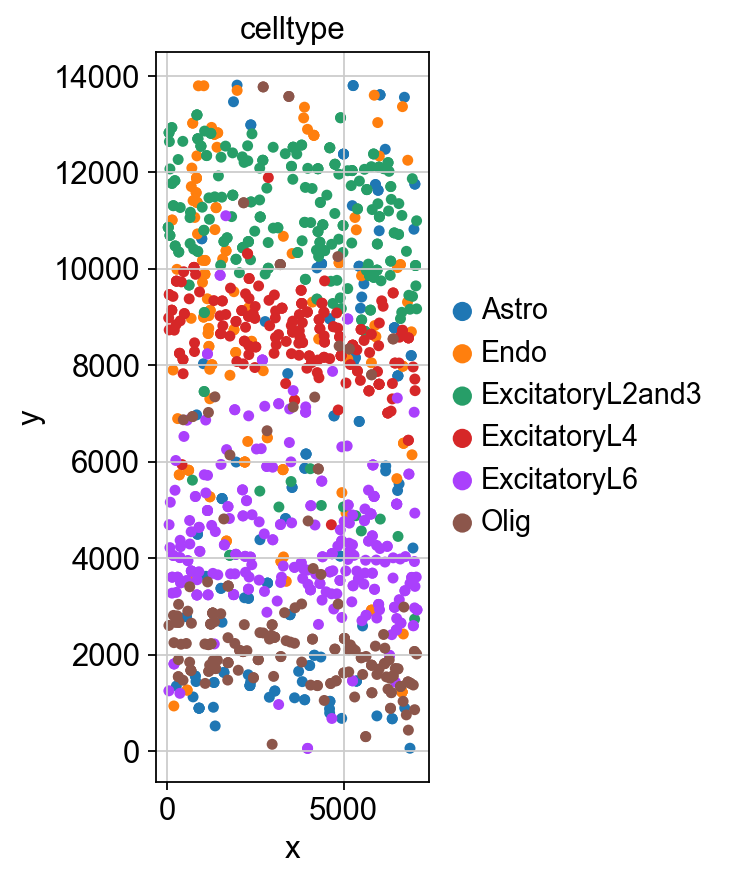

In [15]:
sc.pl.scatter(spider_adata,color="celltype",x="x",y="y")